In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import set_option
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

       - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


нет null, это хорошо, нет нечисловых категориальных данных.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Посмотрим, какие переменные наиболее сильно влияют на MEDV

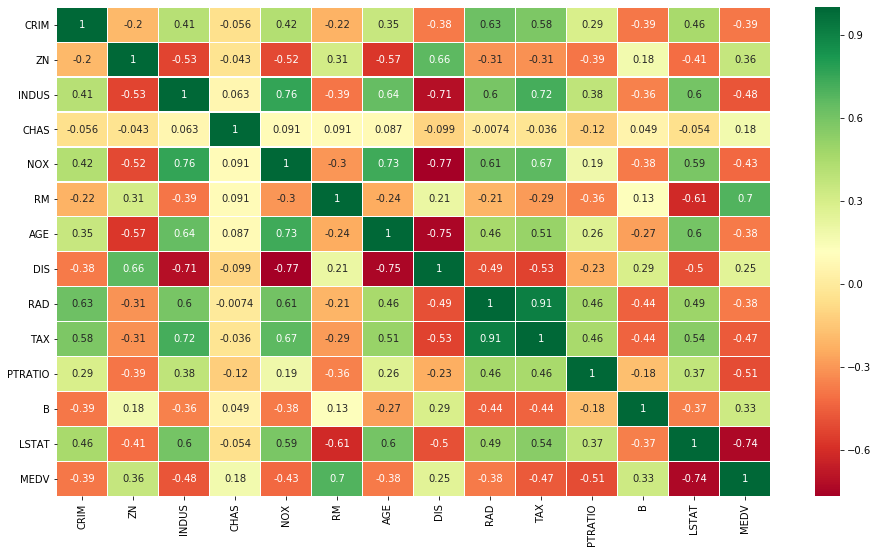

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(16,9)
plt.show()

LSTAT, RM, PTRATIO, INDUS, TAX - наиболее сильно связанные с MEDV переменные


In [19]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [34]:
data_cut = data.drop(columns=[ 'ZN', 'CHAS', 'DIS', 'RAD', 'B']) #исключим самые слабые по корреляции переменные

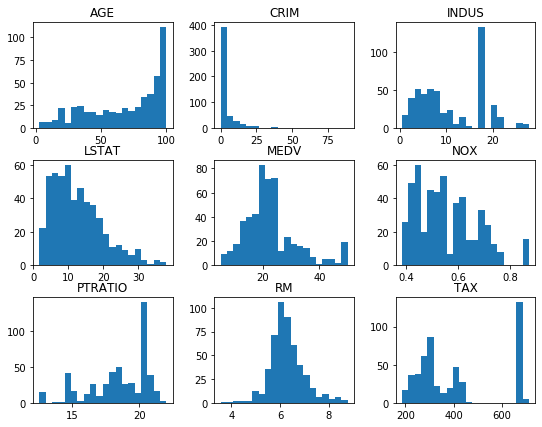

In [35]:
data_cut.hist(bins=20,figsize=(9,7),grid=False)
plt.show()

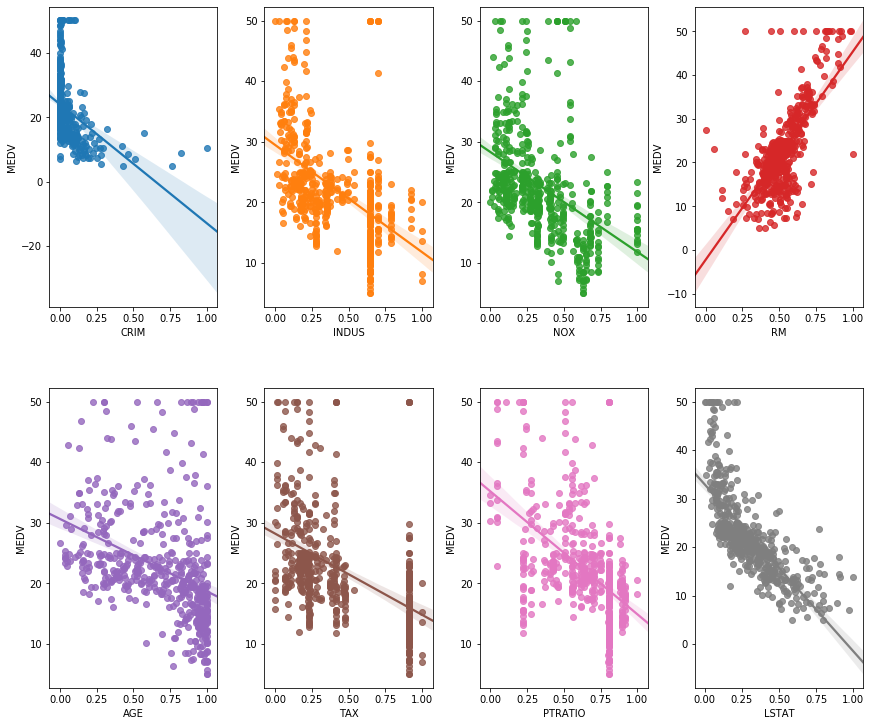

In [36]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = data_cut.drop(columns='MEDV').columns
x = data_cut.drop(columns='MEDV')
y = data_cut['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

графики TAX, PTRATIO, INDUS, NOX - похожи. Если вернуться к матрице корреляции, то видно, что все TAX, INDUS, NOX между собой сильно коррелированы, поэтому выберем один признак из них - INDUS

In [37]:
data_cut = data.drop(columns=[ 'ZN', 'CHAS', 'DIS', 'RAD', 'B','TAX','NOX',])


In [38]:
data_cut.columns

Index(['CRIM', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [46]:
column_sels = data_cut.drop(columns='MEDV').columns
x = data.loc[:,column_sels]
crim  = x['CRIM']
indus = x['INDUS']
rm = x['RM']
age = x['AGE']
lstat = x['LSTAT']
ptratio = x['PTRATIO']

y = data['MEDV']
x = np.vstack([np.array(crim),np.array(indus),np.array(rm), np.array(age), np.array(lstat),np.array(ptratio)]).T
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LinearRegression().fit(X_train, y_train)

In [47]:
model.score(X_test, y_test)

0.6663826202335676

Для улучшения модели попробуем убрать CRIM т.к. корреляция невысокая, а распределение переменной - с большим количеством выбросов.

In [50]:
column_sels = data_cut.drop(columns=['MEDV','CRIM']).columns
x = data.loc[:,column_sels]
indus = x['INDUS']
rm = x['RM']
age = x['AGE']
lstat = x['LSTAT']
ptratio = x['PTRATIO']

y = data['MEDV']
x = np.vstack([np.array(indus),np.array(rm), np.array(age), np.array(lstat),np.array(ptratio)]).T
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.6656782104824532

Значительных изменений не произошло. 
Попробуем очистить целевую переменную - на графиках выше видно, что точки 50 в MEDV - максимум, и в этой точке - выброс. Непорядок. 

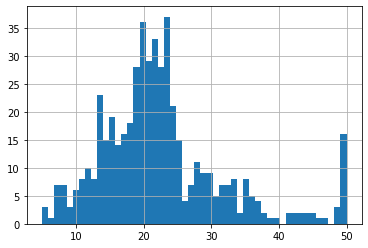

In [54]:
data['MEDV'].hist(bins=50)

In [55]:
data_cut = data_cut[~(data_cut['MEDV'] >= 50.0)]

In [59]:
column_sels = data_cut.drop(columns='MEDV').columns
x = data_cut.loc[:,column_sels]
crim  = x['CRIM']
indus = x['INDUS']
rm = x['RM']
age = x['AGE']
lstat = x['LSTAT']
ptratio = x['PTRATIO']

y = data_cut['MEDV']
x = np.vstack([np.array(crim),np.array(indus),np.array(rm), np.array(age), np.array(lstat),np.array(ptratio)]).T
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7251117354816945

Качество модели улучшилось до 72.5%